#### Task :
Dimensionality reduction and clustering

* Load the 20 News Dataset
          `from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')`

* Use KernelPCA for dimensionality reduction. Train a classifier at different number (at least 5 values) of dimensions, check how model score changes as a function of the number of dimensions dimensions.

          Remember that you can load training and testing subsets of data instead of the whole dataset!

* Cluster 20 News Dataset into 20 clusters for at least 2 for two of the reduced data obtained in the previous point. Print true class vs cluster distribution. Did you manage to recover the original clusters? Describe and comment your results.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.datasets import fetch_20newsgroups_vectorized

In [4]:
#Load the train data subset
news_train = fetch_20newsgroups_vectorized(subset="train")

In [5]:
def print_data_set_info(X,y,dataset_type):
    samples, n_features = X.shape
    n_classes = np.unique(y).shape[0]
    print(f'Dataset : 20newsgroup, data set type = {dataset_type} , total rows = {samples},'
          f' n_features={n_features}, n_classes={n_classes}')


### Taking 7000 samples  from train and test subset to fit and run the model faster and also work in JupyterLab and also

In [6]:
# Getting X_train and y_train from train subset
# With original 11314 itesm is train set and 7532 items in test set the kernel crahses
# in JupyterLab where as it works locally on Jupyter
# So taking 7000 samples  from train and test subset to fit and run the model faster and also work in JupyterLab also
n_samples=7000
X_train = news_train.data[:n_samples]
y_train = news_train.target[:n_samples]
print_data_set_info(X_train, y_train, 'train')

Dataset : 20newsgroup, data set type = train , total rows = 7000, n_features=130107, n_classes=20


In [7]:
# Doing the same for data subset
news_test = fetch_20newsgroups_vectorized(subset="test")
X_test = news_test.data[:n_samples]
y_test = news_test.target[:n_samples]
print_data_set_info(X_test, y_test, 'test')

Dataset : 20newsgroup, data set type = test , total rows = 7000, n_features=130107, n_classes=20


In [9]:
# Scaling the features before doing Kernel PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Using KernelPCA for dimensionality reduction.
### Train a classifier at different number (at least 5 values) of dimensions, check how model score changes as a function of the number of dimensions dimensions.

In [12]:
# Dimensionality reduction and doing classification with KNeighborsClassifier
X_train_kpca_data=[]
X_test_kpca_data=[]
def dimension_reduction_kpca(dimension):
    Kernel_pca = KernelPCA(n_components = dimension, kernel="rbf",)
    # transform and fit the feature of the training set
    X_train_kpca = Kernel_pca.fit_transform(X_train_sc)
    # transform features of the test set
    X_test_kpca = Kernel_pca.transform(X_test_sc)
    print(f'Dimensionality reduction completed with Kernel PCA with selected dimensions/n_components = {dimension} ')
    #Storing reduced dimension data for later use in Clustering
    X_train_kpca_data.append(X_train_kpca)
    X_test_kpca_data.append(X_test_kpca)
    return X_train_kpca, X_test_kpca

In [13]:
from sklearn.linear_model import LogisticRegression
dimension_values = [10,25,50,100,200]
training_accuracy = []
testing_accuracy = []
models = []

for dimensions in dimension_values:
    X_train_kpca, X_test_kpca = dimension_reduction_kpca(dimensions)
    #Fit the KNeighborsClassifier
    model = KNeighborsClassifier()
    model.fit(X_train_kpca, y_train)
    print(f'Accuracy of KNeighbors Classifier with dimensions/n_components: {dimensions} after Kernel PCA on Train set is : {round(model.score(X_train_kpca, y_train),4)}')
    print(f'Accuracy of KNeighbors Classifier with dimensions/n_components: {dimensions} after Kernel PCA on  Test set is : {round(model.score(X_test_kpca, y_test),4)}')
    print('')
    models.append(model)
    #adding model train and test accuracy for plotting below
    training_accuracy.append(round(model.score(X_train_kpca, y_train),4))
    testing_accuracy.append(round(model.score(X_test_kpca, y_test),4))


Dimensionality reduction completed with Kernel PCA with selected dimensions/n_components = 10 
Accuracy of KNeighbors Classifier with dimensions/n_components: 10 after Kernel PCA on Train set is : 0.4447
Accuracy of KNeighbors Classifier with dimensions/n_components: 10 after Kernel PCA on  Test set is : 0.1071

Dimensionality reduction completed with Kernel PCA with selected dimensions/n_components = 25 
Accuracy of KNeighbors Classifier with dimensions/n_components: 25 after Kernel PCA on Train set is : 0.6211
Accuracy of KNeighbors Classifier with dimensions/n_components: 25 after Kernel PCA on  Test set is : 0.1817

Dimensionality reduction completed with Kernel PCA with selected dimensions/n_components = 50 
Accuracy of KNeighbors Classifier with dimensions/n_components: 50 after Kernel PCA on Train set is : 0.6899
Accuracy of KNeighbors Classifier with dimensions/n_components: 50 after Kernel PCA on  Test set is : 0.2263

Dimensionality reduction completed with Kernel PCA with se

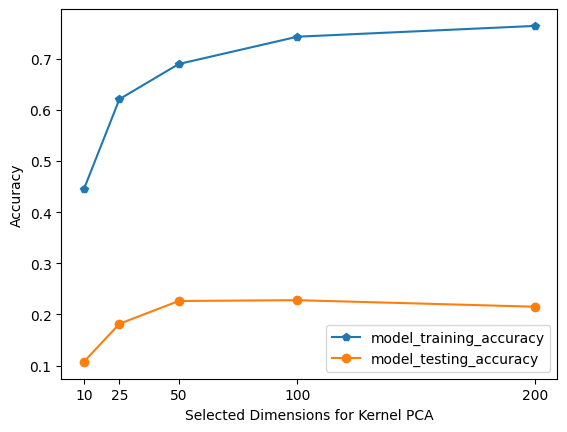

In [14]:
#Plotting the train and test scores with dimension values(or n_components) set to 10, 25, 50, 100, 200 dimensions(or n_components)
plt.plot(dimension_values, training_accuracy, label="model_training_accuracy", marker='p')
plt.plot(dimension_values, testing_accuracy, label="model_testing_accuracy", marker='o')
plt.ylabel("Accuracy")
plt.xlabel("Selected Dimensions for Kernel PCA")
plt.xticks(dimension_values)
plt.legend()
plt.show()

## The accuracy of the model gradually increase with increase in number of components we egt via Kernel PCA from 0.1071 with 10 components to 0.2279 with 100 components but with 200 components it comes down a bit to 0.2151 on test set

#### Cluster 20 News Dataset into 20 clusters for at least 2 of the reduced data obtained in the previous point. Print true class vs cluster distribution.

##### KMeans Clustering with 20 Clusters using above store Kernel PCA reduced data for n_components=50 and n_components = 100


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting the Cluster assignments and Cluster centers with KMena on reduced data for test set from Kernel PCA with 50 dimensions/n_components


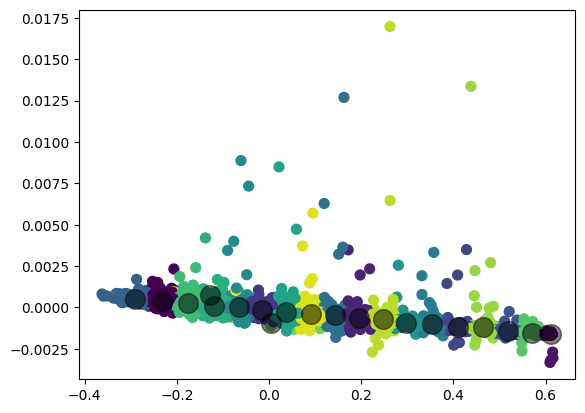

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Plotting the Cluster assignments and Cluster centers with KMena on reduced data for test set from Kernel PCA with 100 dimensions/n_components


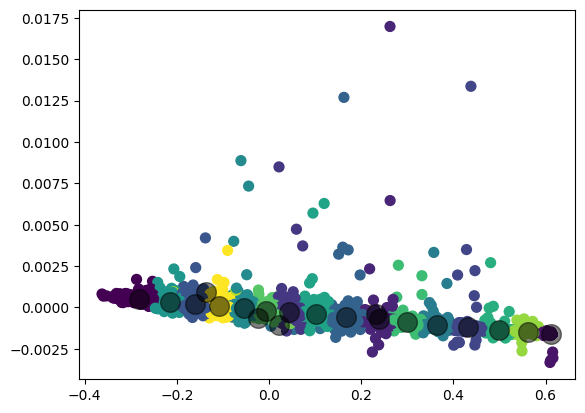

In [17]:
# For Clustering selecting the reduced test set after the Kernel PCA
# Reduced data for n_components=50 is in index 2 and n_components=100 at index 3 in X_test_kpca_data
X_test_kpcas = [X_test_kpca_data[2], X_test_kpca_data[3]]
n_components=[50,100]
y_pred_cluster=[]
for X_test_kpca, num_dim in zip(X_test_kpcas, n_components):
    # Initialize KMeans clustering
    kmeans=KMeans(n_clusters=20, random_state=42)
    kmeans.fit(X_test_kpca)
    y_pred = kmeans.predict(X_test_kpca)
    y_pred_cluster.append(y_pred)
    # plot the cluster assignments and cluster centers
    print(f'Plotting the Cluster assignments and Cluster centers with KMena on reduced data for test set from Kernel PCA with {num_dim} dimensions/n_components')
    plt.scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=y_pred, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()


### Print true class vs cluster distribution

In [18]:
# Since we used X_test_kpca data for clustering my true class
# true class or true label is the actual y_test
# whereas the y_pred or cluster predicted by Kmeans

## True class vs cluster distribution with (y_pred) Kmeans with 50 dimensions (via Kernel PCA)
df = pd.DataFrame(zip(y_test, y_pred_cluster[0]), columns=('y_test', 'y_pred_cluster'))
df

,y_test,y_pred_cluster
0,2,1
1,0,1
2,11,1
3,10,16
4,10,4
...,...,...
6995,10,10
6996,5,1
6997,16,16
6998,7,8


In [19]:
# Since we used X_test_kpca data for clustering my true class
# true class or true label is the actual y_test
# whereas the y_pred or cluster predicted by Kmeans

## True class vs cluster distribution with (y_pred) Kmeans with 100 dimensions (via Kernel PCA)
df1 = pd.DataFrame(zip(y_test, y_pred_cluster[1]), columns=('y_test', 'y_pred_cluster'))
df1

,y_test,y_pred_cluster
0,2,1
1,0,1
2,11,1
3,10,4
4,10,8
...,...,...
6995,10,13
6996,5,1
6997,16,4
6998,7,8


In [20]:
#Printing distribution of data points in original fetch_20newsgroups_vectorized test set
df['y_test'].value_counts().sort_index()

0     303
1     360
2     366
3     369
4     362
5     366
6     361
7     366
8     376
9     371
10    368
11    368
12    368
13    364
14    364
15    370
16    342
17    349
18    276
19    231
Name: y_test, dtype: int64

In [21]:
#Printing distribution of data points in clusters by Kmeans with 20 clusters and 50 components
df['y_pred_cluster'].value_counts().sort_index()

0      301
1     2053
2      234
3      336
4      240
5      260
6      188
7      266
8      235
9      315
10     250
11     323
12     402
13     413
14     342
15       6
16     263
17     255
18     313
19       5
Name: y_pred_cluster, dtype: int64

In [22]:
#Printing distribution of data points in clusters by Kmeans with 20 clusters and 100 components
df1['y_pred_cluster'].value_counts().sort_index()

0      251
1     2102
2      322
3      334
4      313
5      380
6      333
7        4
8      267
9      319
10     356
11     357
12     311
13     291
14     308
15       4
16     367
17       4
18       2
19     375
Name: y_pred_cluster, dtype: int64

### Did you manage to recover the original clusters? Describe and comment your results.

In [23]:
# Accuracy of labels/ cluster prdicted using Kmeans with 50 components
acc1 =accuracy_score(y_test, y_pred_cluster[0])
print(f'Accuracy score with 50 componentes is  {round((acc1 *100),4)} %')

Accuracy score with 50 componentes is  5.0429 %


In [24]:
# Accuracy of labels/ cluster prdicted using Kmeans with 100 components
acc2=accuracy_score(y_test, y_pred_cluster[1])
print(f'Accuracy score 100 components is {round((acc2 *100),4)} %')

Accuracy score 100 componentes is 5.2143 %


### From such  low accuracy score we can see that we are unable to recover the original clusters with both 50 and 100 components.
#### Also from the distribution of points among original clusters in th actual set in comparison to the the distribution in the one we have predicted with KMeans is quite different as in the original data set except cluster 1,18 and 19 all other cluster have approximetly equal number of data points where as the one we precited seem to not the same. So we can conlud that KMeans clustering with reduced 50 components and 100 components is very poor with accuracy score of  5.0429 % with 50 componenets and 5.2143 % with 100 components are not good and we are unable to get get the original clusters.